<center><img src="https://is1-ssl.mzstatic.com/image/thumb/Purple122/v4/05/e7/67/05e76784-3364-b535-7e20-b3f4946a56b6/AppIcon-0-0-1x_U007emarketing-0-0-0-7-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/434x0w.webp" style="height:150px"></center>

<hr style="border-width:2px;border-color:red">
<center><h1>Test Technique Data Scientist</h1></center>
<center><h2> Mesure de la dérive </h2></center>
<hr style="border-width:2px;border-color:red">

# Contexte

La **dérive** en apprentissage automatique (ou **"drift"** en anglais) fait référence à un **changement dans les données d'entrée ou de sortie d'un modèle** de machine learning **après son entraînement initial**. Cela peut se produire lorsque les données utilisées pour entraîner le modèle ne **reflètent plus la réalité**, ou lorsque **les conditions du problème changent de manière significative**.

La dérive des données peut affecter la précision du modèle de manière significative et peut entraîner des erreurs coûteuses dans les prévisions ou les décisions basées sur le modèle. Par conséquent, **il est important de surveiller régulièrement les performances du modèle** et de le mettre à jour en fonction des nouveaux jeux de données ou des nouvelles conditions du problème.

# Objectif

Dans ce test, vous allez implémenter des métriques permettant de mesurer la dérive d'un modèle dans un usecase de **e-commerce** où nous essayons de prédire le **panier total** (variable **`TotalCart`** : chiffre d'affaire total d'un client sur la période donnée) des clients en fonction des variables suivantes:
* **`Age`** : âge du client en années.
* **`Seniority`** : ancienneté du client en années.
* **`Orders`** : Nombre de commandes effectuées sur la période précédente.
* **`Items`** : Nombre d'items commandés sur la période précédente.
* **`AverageDiscount`** : Réduction moyenne accordée au client sur la période précédente en pourcentage.
* **`TopCategory`** : Catégorie de produits favorite du client.
* **`BrowsingTime`** : Temps total passé sur le site web sur la période précédente en secondes.
* **`EmailsOpened`** : Nombre de mails marketing ouverts par le client sur la période précédente.
* **`SupportInteractions`** : Nombre d'interactions que le client a eu avec le service client sur la période précédente.

Le jeu de données est décomposé en 4 périodes correspondant aux 4 trimestres de l'année 2022. Vous trouverez les données correspondant à chaque période dans les fichiers **`period_0.csv`**, **`period_1.csv`**, ..., **`period_3.csv`**.

Vous allez d'abord **entraîner et évaluer un modèle de machine learning** sur les données de la **période 0**. On supposera que ce modèle sera utilisé pour effectuer les prédictions de panier total sur toute l'année 2022.

Ensuite, vous devrez **implémenter des métriques de dérive** qui vous seront données et **effectuer une analyse** de celle-ci.

# Entraînement du modèle

* **Entraînez et validez** deux ou trois modèles de votre choix sur les données de la période 0. 

**Conseils**

* Vous serez évalué sur votre **rigueur** et non sur les performances du modèle.


* Il n'est pas nécessaire de faire une analyse exploratoire des données.


* Il n'est pas nécessaire de faire de recherche d'hyperparamètres optimaux non plus mais vous pouvez le faire si vous le souhaitez.

### <p style="text-align:left"><span style="color:green">Importing Required `Libraries`</span></p>

In [1]:
# Data manipulation and analysis libraries:
import numpy as np
import pandas as pd

# Data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns

# Other libraries:
#from tqdm import tqdm
from dotenv import load_dotenv
import warnings
import os

# Data science imports:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    BaggingRegressor,
)

# Configure pandas to display all columns:
pd.set_option('display.max_columns', None)

# Render figures directly in the notebook:
%matplotlib inline

# Render higher resolution images:
%config InlineBackend.figure_format = 'retina'

# Ignore warning messages:
warnings.filterwarnings('ignore')

### <p style="text-align:left"><span style="color:green">Reading the `CSV Files`</span></p>

In [2]:
# Load environment variables from .env file
load_dotenv()

# Set the path to the directory where csv data is stored
DATA_PATH = os.getenv("DATA_PATH")


# Listing the different datasets on our data directory
files = sorted(os.listdir(DATA_PATH))
for file in files:
    print(file)

period_0.csv
period_1.csv
period_2.csv
period_3.csv


In [3]:
# Reading the datasets
periods = [] # Here we will store the datsets
for file in files:
    file_path = os.path.join(DATA_PATH, file)
    period = pd.read_csv(file_path)
    periods.append(period)

## <p style="text-align:center"><span style="color:red">Training a model on `period_0 data`</span></p>

In [4]:
quarter_0 = periods[0]
quarter_0.head(2)

,Age,Seniority,Orders,Items,AverageDiscount,TopCategory,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart
0,21,2,4,7,0.14,"Clothing,Shoes & Jewelry",68.473629,3,2,34.00
1,22,0,4,5,0.50,Toys & Games,29.258063,1,0,28.28


### <p style="text-align:left"><span style="color:green">Analysing the `Missingness`</span></p>

In [5]:
missing_count = quarter_0.isnull().sum()
missing_percentage = (missing_count / len(quarter_0)) * 100
missing_data = pd.DataFrame({'Missing Count': missing_count, 
                             'Missing Percentage': missing_percentage})

missing_data.sort_values('Missing Count', ascending=False).head(3)

,Missing Count,Missing Percentage
Age,0,0.0
Seniority,0,0.0
Orders,0,0.0


> No Missing data to handle !

### <p style="text-align:left"><span style="color:green">Analysing `TotalCart` Distrubution</span></p>

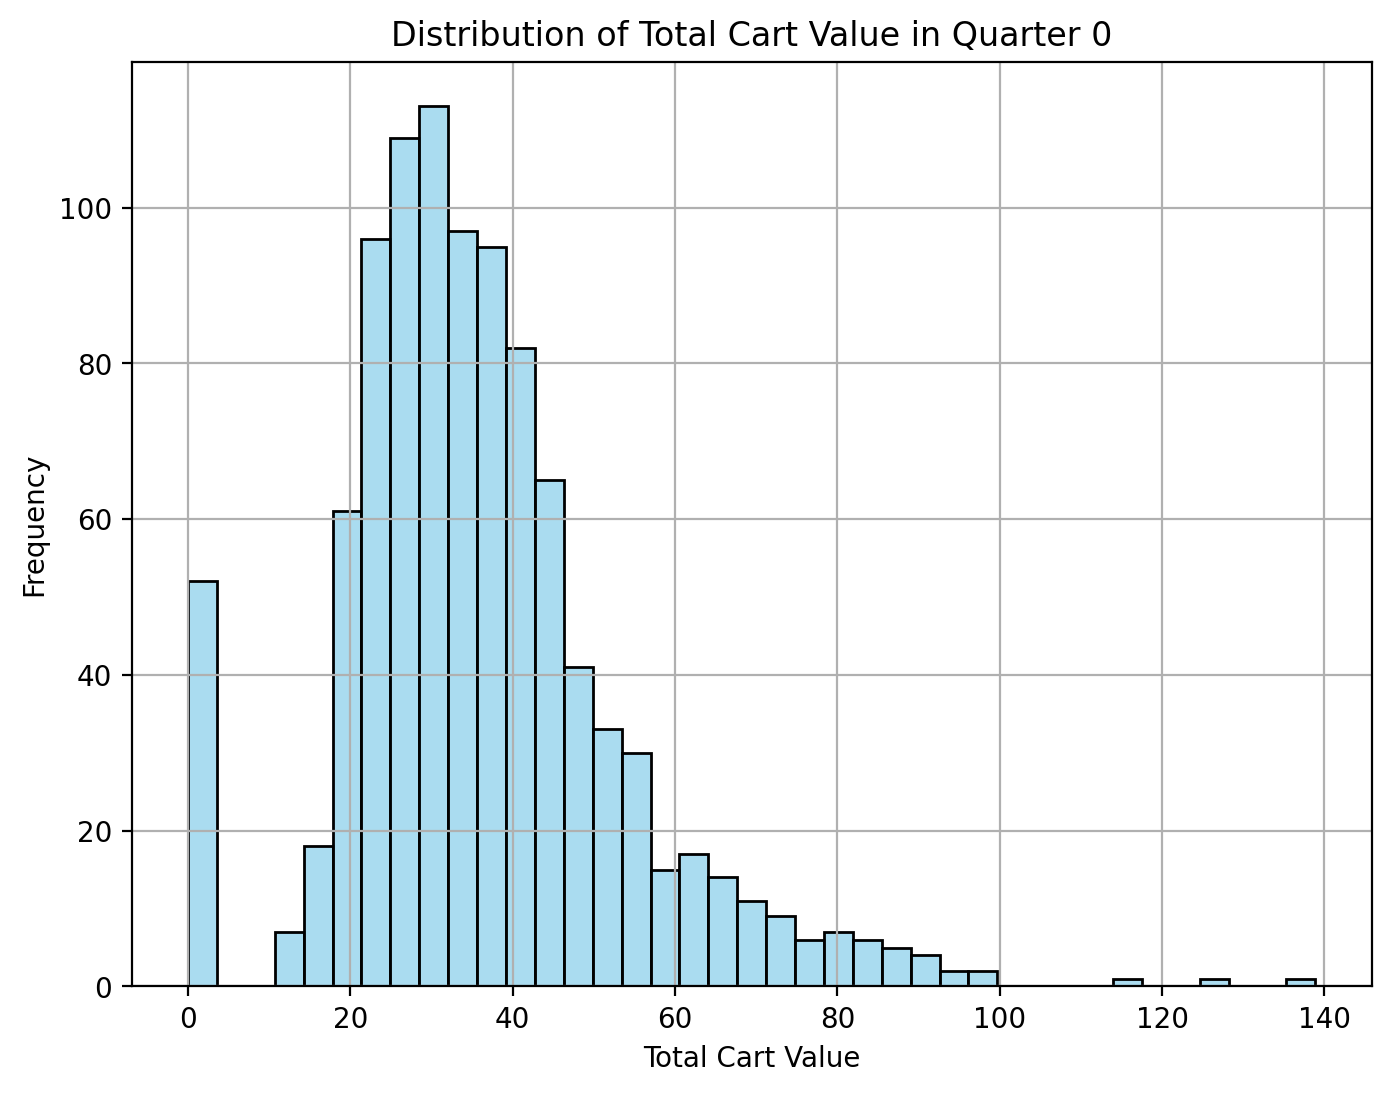

In [21]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=quarter_0, x="TotalCart", color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Total Cart Value")
plt.ylabel("Frequency")
plt.title("Distribution of Total Cart Value in Quarter 0")
plt.grid(True)  
plt.show()

### <p style="text-align:left"><span style="color:green">Feature `Engineering`</span></p>
Lets add those features that can be relevent to our problem :
> * **`AverageTimePerOrder`**: The average time spent browsing per order. ( $AverageOrderValue = \frac{BrowsingTime}{Orders}$ )
> * **`AverageOrderValue`**: The average order value. ( $AverageOrderValue = \frac{TotalCart}{Orders}$ )

In [22]:
quarter_0["AverageTimePerOrder"] = quarter_0["BrowsingTime"] / quarter_0["Orders"]
quarter_0["AverageOrderValue"] = quarter_0["TotalCart"] / quarter_0["Orders"]

In [23]:
quarter_0.head(1)

,Age,Seniority,Orders,Items,AverageDiscount,TopCategory,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart,AverageTimePerOrder,AverageOrderValue
0,21,2,4,7,0.14,1,68.473629,3,2,34.0,17.118407,8.5


### <p style="text-align:left"><span style="color:green">Handling the `Categorical columns`</span></p>

In [24]:
quarter_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   int64  
 1   Seniority            1000 non-null   int64  
 2   Orders               1000 non-null   int64  
 3   Items                1000 non-null   int64  
 4   AverageDiscount      1000 non-null   float64
 5   TopCategory          1000 non-null   int64  
 6   BrowsingTime         1000 non-null   float64
 7   EmailsOpened         1000 non-null   int64  
 8   SupportInteractions  1000 non-null   int64  
 9   TotalCart            1000 non-null   float64
 10  AverageTimePerOrder  1000 non-null   float64
 11  AverageOrderValue    948 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 93.9 KB


In [25]:
quarter_0['TopCategory'].unique()

array([1, 8, 3, 2, 4, 6, 0, 7, 5])

In [26]:
# Coverting the labels into a numeric form using Label Encoder
le = LabelEncoder()
for col in quarter_0.columns:
    if quarter_0[col].dtype=='object':
        quarter_0[col]=le.fit_transform(quarter_0[col])

In [27]:
quarter_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   int64  
 1   Seniority            1000 non-null   int64  
 2   Orders               1000 non-null   int64  
 3   Items                1000 non-null   int64  
 4   AverageDiscount      1000 non-null   float64
 5   TopCategory          1000 non-null   int64  
 6   BrowsingTime         1000 non-null   float64
 7   EmailsOpened         1000 non-null   int64  
 8   SupportInteractions  1000 non-null   int64  
 9   TotalCart            1000 non-null   float64
 10  AverageTimePerOrder  1000 non-null   float64
 11  AverageOrderValue    948 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 93.9 KB


In [28]:
quarter_0['TopCategory'].unique()

array([1, 8, 3, 2, 4, 6, 0, 7, 5])

### <p style="text-align:left"><span style="color:green">Analysing the `Correlation`</span></p>

In [31]:
ordred_cols = ['Age',
                 'Seniority',
                 'Orders',
                 'Items',
                 'AverageDiscount',
                 'TopCategory',
                 'BrowsingTime',
                 'EmailsOpened',
                 'SupportInteractions',
                 'AverageTimePerOrder',
                 'AverageOrderValue',
                 'TotalCart'] 


quarter_0 = quarter_0[ordred_cols]

<Axes: >

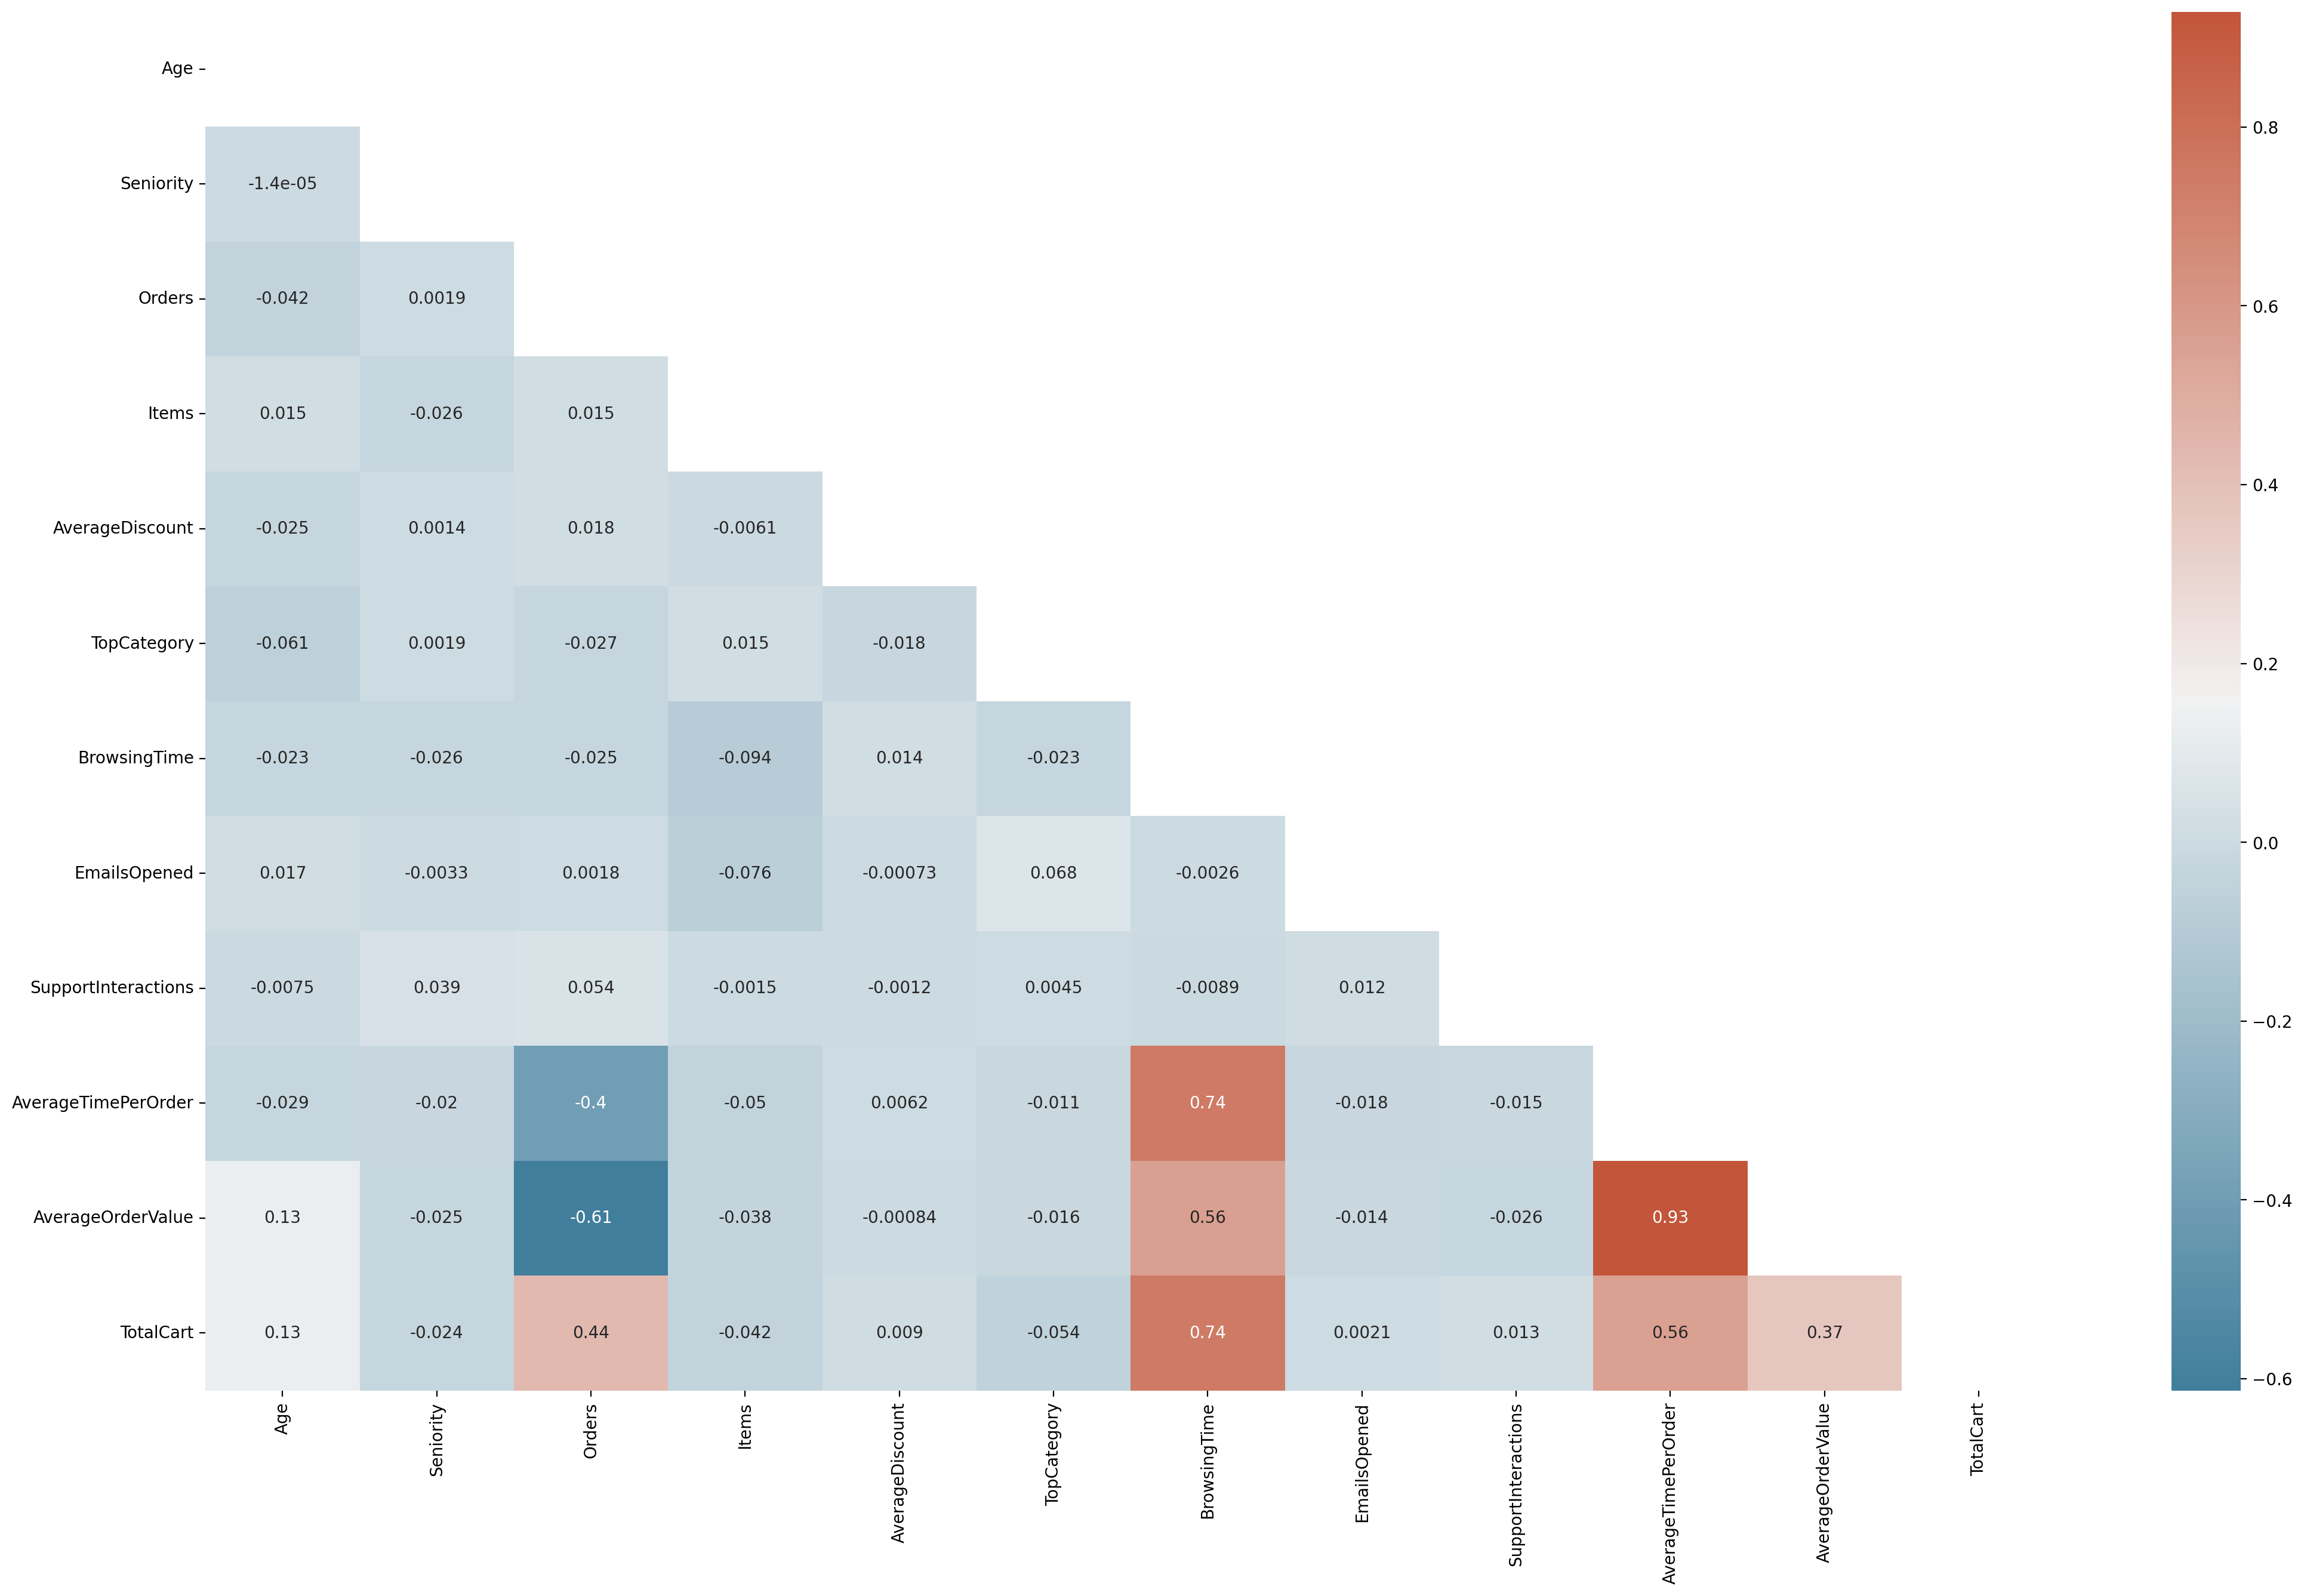

In [32]:
plt.figure(figsize=(25, 15))
corr = quarter_0.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap)

In [35]:
# Defining the target variable
target = 'TotalCart'

# Defining the Correlation Threshold
correlation_threshold = 0.35

# Selecting the Highly Correlated Features 
highly_correlated_features = corr[corr[target] >= correlation_threshold].index.to_list()
highly_correlated_features.remove(target)

# Diplaying the selected Features
print(f'The highly correlated variables with the "{target}" varible are: {highly_correlated_features}')

The highly correlated variables with the "TotalCart" varible are: ['Orders', 'BrowsingTime', 'AverageTimePerOrder', 'AverageOrderValue']


### <p style="text-align:left"><span style="color:green">Model `Training`</span></p>

In [36]:
# storing the Dependent Variables in X and Independent Variable in Y
target = 'TotalCart'
features = highly_correlated_features
test_size = 0.15

x = quarter_0.drop(target, axis=1)
y = quarter_0[target]

# Splitting the Data into Training set and Testing Set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

# Display shape information for training and test datasets
print(f"Training data:\nX shape: {x_train.shape}\nY shape: {y_train.shape}\n")
print(f"Test data:\nX shape: {x_test.shape}\nY shape: {y_test.shape}\n")

Training data:
X shape: (850, 11)
Y shape: (850,)

Test data:
X shape: (150, 11)
Y shape: (150,)



In [37]:
# Define models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    BaggingRegressor(),
    RandomForestRegressor(n_estimators=100,
                      criterion='absolute_error',
                      max_depth=None,
                      min_samples_split=2,
                      min_samples_leaf=1,
                      min_weight_fraction_leaf=0.0,
                      max_features='auto',
                      max_leaf_nodes=None,
                      random_state=None,
                      n_jobs=None,
                      verbose=0,
                      warm_start=False),
    SVR(),
    # xgb.XGBRegressor(),
    KNeighborsRegressor(n_neighbors=5),
    Ridge(),
    Lasso(alpha=0.1),
    GradientBoostingRegressor(),
    ExtraTreesRegressor()
]

# Define evaluation metrics
evaluation_metrics = [
    lambda y_true, y_pred: np.sqrt(metrics.mean_squared_error(y_true, y_pred)),
    metrics.mean_squared_error,
    metrics.mean_absolute_error,
    metrics.r2_score,
    metrics.mean_absolute_percentage_error,
    metrics.median_absolute_error
]


# Define a function to evaluate each model
def evaluate_model(model, x_test, y_test, evaluation_metrics):
    y_pred = model.predict(x_test)
    scores = {}
    for metric in evaluation_metrics:
        name = metric.__name__
        score = metric(y_test, y_pred)
        scores[name] = score
    return scores

In [38]:
# Evaluate models and store results in a DataFrame
results = []
for model in models:
    model_name = type(model).__name__
    model.fit(x_train, y_train)
    print(f"done for the model {model_name}")
    scores = evaluate_model(model, x_test, y_test, evaluation_metrics)
    results.append({'Model Name': model_name, **scores})
results_df = pd.DataFrame(results)

# Rename the <lambda> column to RMSE
results_df = results_df.rename(columns={"<lambda>": "root_mean_squared_error"})


winners = results_df.sort_values("root_mean_squared_error", ascending=True)
winner_name = f'{winners.iloc[0,0]}'
winner_RMSE = f'{winners.iloc[0,1]:.2f}'
winner_MSE = f'{winners.iloc[0,2]:.2f}'
winner_MAE = f'{winners.iloc[0,3]:.2f}'
winner_R2 = f'{winners.iloc[0,4]:.2f}'
winners

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
dd

* **Entrainez votre modèle sur toute la période 0** puis **testez votre modèle** sur les données des **périodes 1, 2 et 3**. Comment évolue la performance du modèle?

In [ ]:
# Insérez votre code ici




# Mesure de la dérive de variables catégorielles.

Pour deux distributions de probabilités discrètes $P$ et $Q$, la **divergence de Kullback–Leibler** de $P$ par rapport à $Q$ est définie par:

$$D_\text{KL}(P \parallel Q) = \sum_{x\in\mathcal{X}} P(x) \log\left(\frac{P(x)}{Q(x)}\right)$$


On définit la **divergence de Jensen-Shannon** comme une version lisse et symétrique de la divergence de Kullback-Leiber donnée par la formule suivante:

$${\rm JSD}(P \parallel Q)= \frac{1}{2}D(P \parallel M)+\frac{1}{2}D(Q \parallel M)$$

où $M=\frac{1}{2}(P+Q)$

### Exemple de calcul de $D_\text{KL}(P \parallel Q)$ : 

Soient $P$ =`[0.2, 0.3, 0.5]` et $Q$ =`[0.2, 0.4, 0.4]` deux vecteurs définissant une loi de probabilité discrete. Alors : 

$$
\begin{equation}
\begin{split}
D_\text{KL}(P \parallel Q) & = P(0) \log\left(\frac{P(0)}{Q(0)}\right)
                             + P(1) \log\left(\frac{P(1)}{Q(1)}\right)
                             + P(2) \log\left(\frac{P(2)}{Q(2)}\right)\\ \\
                           & = 0.2 \log\left(\frac{0.2}{0.2}\right)
                             + 0.3 \log\left(\frac{0.3}{0.4}\right)
                             + 0.5 \log\left(\frac{0.5}{0.4}\right) \\ \\
                           & = 0.02526...
\end{split}
\end{equation}
$$

### Exercice

* Implémenter des fonctions nommées **`KLDivergence(P, Q)`** et **`JSDivergence(P, Q)`** permettant de calculer les métriques définies ci-dessus.

**Conseils**:
* Utiliser la librairie Numpy permettant de facilement effectuer des calculs d'algèbre linéaire.

In [ ]:
import numpy as np 

P = np.array([0.2, 0.3, 0.5])
Q = np.array([0.2, 0.4, 0.4])

def KLDivergence(P, Q):
    
    # Insérez votre code ici
    
    return None 

def JSDivergence(P, Q):
    
    # Insérez votre code ici
    
    return None
    

* Lancer la cellule suivante pour tester votre fonction.

In [ ]:
print("K-L Divergence:", KLDivergence(P, Q))
print("J-S Divergence:", JSDivergence(P, Q))

# Mesure de la dérive de variables quantitatives.

Soit $P$ une mesure empirique d'échantillons $X_1, \ldots, X_n
$ et $Q$ une mesure empirique d'échantillons $Y_1, \ldots, Y_n$, on définit la **Distance de Wasserstein** d'ordre $p$ par la fonction suivante :

$$W_p(P, Q) = \left( \frac{1}{n}\sum_{i=1}^n \|X_{(i)} - Y_{(i)}\|^p \right)^{1/p}$$

où $X_{(1)}, \ldots, X_{(n)}$ et $Y_{(1)}, \ldots, Y_{(n)}$ sont les [**statistiques d'ordre**](https://en.wikipedia.org/wiki/Order_statistic#Notation_and_examples) des échantillons $X$ et $Y$ et $p$ un nombre entier positif.

### Exercice

* Implémenter une fonction nommée **`WassersteinDistance(X, Y, p)`** permettant de calculer cette métrique à l'ordre **`p`** à partir de **deux échantillons** **`X`** et **`Y`** que l'on supposera de même longueur.

**Conseils**:
* Vous pouvez trier les échantillons pour obtenir les statistiques d'ordre.

In [ ]:
def WassersteinDistance(X, Y, p):
    
    # Insérez votre code ici
    
    return None
    

* Lancer la cellule suivante pour tester votre fonction.

In [ ]:
X = np.random.beta(2, 6, 100)

Y = np.random.beta(3, 6, 100)

WassersteinDistance(X, Y, 2)

# Étude de la dérive du modèle.

* En vous appuyant sur les métriques définies précédemment, illustrez et analysez visuellement la **dérive des données** ainsi que **la dérive du modèle** sur les périodes **1 à 3**. 


* Commenter les visualisations et déterminer si le modèle doit être mis à jour ou si sa performance est toujours acceptable. 

**Conseils**:
* Vous serez évalué sur **la rigueur et le soin** que vous donnerez à votre analyse, et sur **vos capacités à synthéthiser votre étude**. Vous ne serez pas évalué sur vos conclusions.


* Vous pouvez normaliser les données par rapport aux **moyennes et variances que vous calculerez sur la période 0** pour que les distances de Wasserstein pour différentes variables soient facilement comparables.

In [ ]:
# Insérez votre code ici


